In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

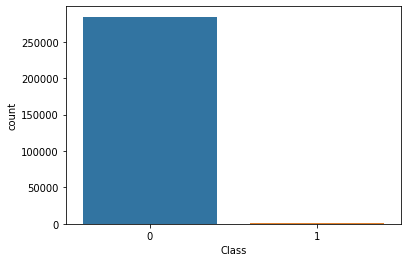

In [11]:
sns.countplot('Class', data=df)

In [13]:
df['Class'].value_counts()[0], df['Class'].value_counts()[1]

(284315, 492)

**It shows that the data is unbalanced. To get a better model we need to make a good sample.**

In [18]:
fraud=df.loc[df['Class']==1]
no_fraud=df.loc[df['Class']==0][:492]

In [21]:
data=pd.concat([fraud,no_fraud])

In [23]:
new_data = data.sample(frac=1, random_state=42)

In [24]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258714,158784.0,0.913083,-1.325163,-0.375476,4.312244,-0.444362,1.170903,0.134283,0.162405,-0.082552,...,-0.106394,-1.229309,0.041306,0.546305,-0.639913,-0.486953,-0.072014,0.062027,491.66,0
154633,102318.0,-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,-0.682741,...,0.773631,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089,22.04,1
263155,160822.0,-0.795913,0.003251,0.999692,-2.313648,-0.538761,-0.261190,-0.423374,0.577619,-1.114997,...,0.482410,1.115012,-0.260091,-0.373915,-0.006565,-0.175591,-0.012846,0.033934,24.99,0
95534,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1
233258,147501.0,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,...,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,996.27,1


In [26]:
new_data['Class'].value_counts()[0], new_data['Class'].value_counts()[1]

(492, 492)

In [27]:
df1=new_data.copy()

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1['scaled_amount']=ss.fit_transform(df1['Amount'].values.reshape(-1,1))
df1['scaled_time']=ss.fit_transform(df1['Time'].values.reshape(-1,1))

df1.drop(['Time','Amount'],axis=1,inplace=True)

In [32]:
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
258714,0.913083,-1.325163,-0.375476,4.312244,-0.444362,1.170903,0.134283,0.162405,-0.082552,0.952382,...,-1.229309,0.041306,0.546305,-0.639913,-0.486953,-0.072014,0.062027,0,1.437267,1.480217
154633,-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,-0.682741,-4.363102,...,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089,1,-0.353957,0.316577
263155,-0.795913,0.003251,0.999692,-2.313648,-0.538761,-0.261190,-0.423374,0.577619,-1.114997,-0.342081,...,1.115012,-0.260091,-0.373915,-0.006565,-0.175591,-0.012846,0.033934,0,-0.342705,1.522216
95534,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,-0.371672,...,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,1,-0.316311,-0.445088
233258,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,-1.445375,...,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,1,3.361950,1.247699


In [33]:
scaled_amount = df1['scaled_amount']
scaled_time = df1['scaled_time']

df1.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df1.insert(0, 'scaled_amount', scaled_amount)
df1.insert(1, 'scaled_time', scaled_time)

In [34]:
df1.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
258714,1.437267,1.480217,0.913083,-1.325163,-0.375476,4.312244,-0.444362,1.170903,0.134283,0.162405,...,0.709883,-0.106394,-1.229309,0.041306,0.546305,-0.639913,-0.486953,-0.072014,0.062027,0
154633,-0.353957,0.316577,-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,...,0.443489,0.773631,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089,1
263155,-0.342705,1.522216,-0.795913,0.003251,0.999692,-2.313648,-0.538761,-0.261190,-0.423374,0.577619,...,-0.056257,0.482410,1.115012,-0.260091,-0.373915,-0.006565,-0.175591,-0.012846,0.033934,0
95534,-0.316311,-0.445088,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,...,0.062908,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,1
233258,3.361950,1.247699,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,...,2.425677,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,1


<AxesSubplot:>

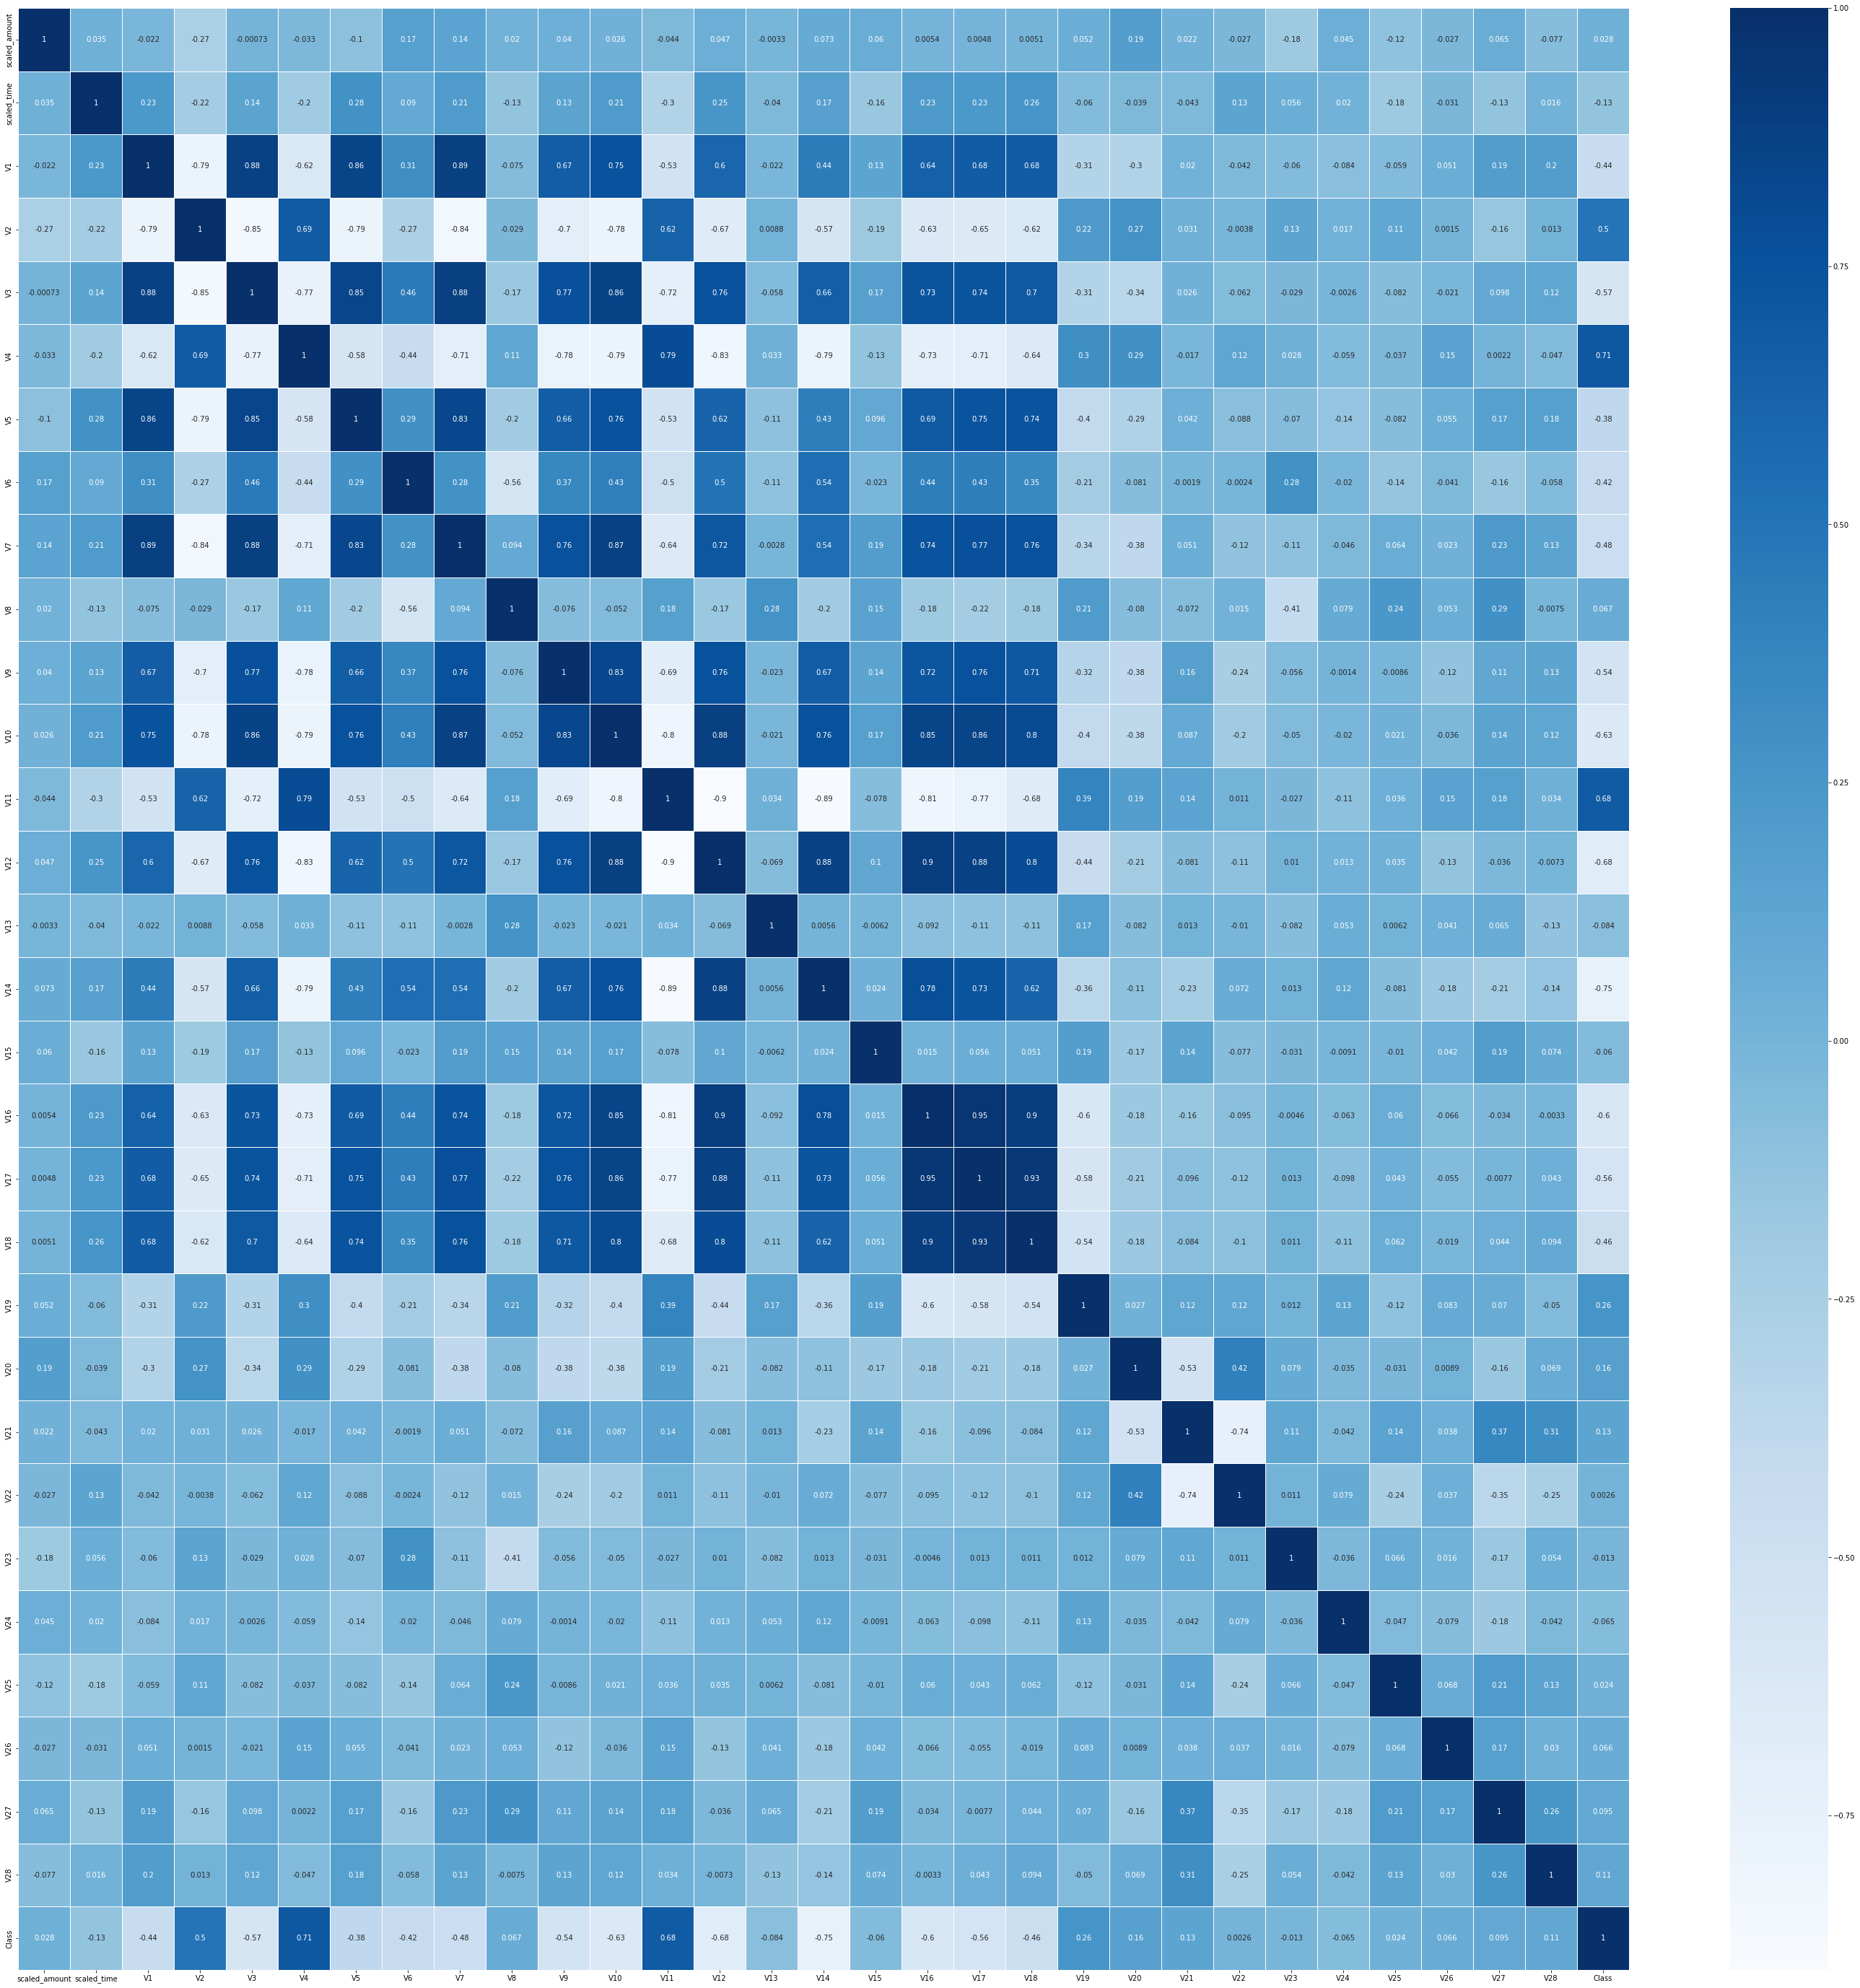

In [36]:
fig, ax=plt.subplots(figsize=(50,50))
sns.heatmap(df1.corr(),cmap='Blues',annot=True,linewidth=0.5,ax=ax)

In [37]:
x = df1.drop('Class', axis=1)
y = df1['Class']

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.svm import SVC

In [38]:
from sklearn.model_selection import ParameterGrid, GridSearchCV

In [39]:
c_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 0.01, 0.001, 0.0001]
kernels = ['rbf', 'sigmoid']
param_grid = {'C': c_values, 'gamma': gamma_values, 'kernel': kernels}

In [42]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [45]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.797 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.829 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.758 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.758 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.822 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [46]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [50]:
svc_tuned=SVC(C= 10, gamma= 0.01, kernel= 'rbf')

In [55]:
model=svc_tuned.fit(x_train,y_train)

In [56]:
y_pred=model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,model.predict(x_train))

0.9707750952986023

In [59]:
accuracy_score(y_test,model.predict(x_test))

0.9543147208121827

In [60]:
from sklearn.metrics import plot_confusion_matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


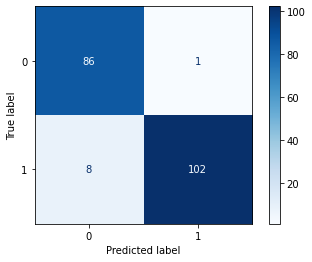

In [61]:
plot_confusion_matrix(model, x_test, y_test,cmap='Blues')  
plt.show()

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.99      0.93      0.96       110

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197

